Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.


In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [46]:
boston = load_boston()
data = boston["data"]
feature_names = boston["feature_names"]
x = pd.DataFrame(data, columns=feature_names)
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [47]:
target = boston["target"]
y = pd.DataFrame(target, columns=["price"])

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42 )

In [78]:
scaler = StandardScaler()
x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

In [79]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

x_train_tsne = tsne.fit_transform(x_train_scaled)

print('До:\t{}'.format(x_train_scaled.shape))
print('После:\t{}'.format(x_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


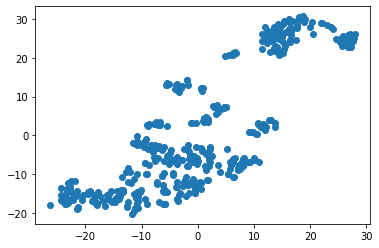

In [80]:
plt.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1])

plt.show()

Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.

Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.


In [81]:
from sklearn.cluster import KMeans

In [85]:
model_km = KMeans(n_clusters=3, random_state=100)
train_labels = model_km.fit_predict(x_train_scaled)

array([0, 2, 1, 0, 2, 2, 2, 1, 0, 0, 2, 2, 2, 0, 2, 2, 2, 1, 2, 1, 0, 2,
       1, 2, 1, 2, 0, 1, 2, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 1, 1, 2, 0, 2,
       0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1,
       0, 2, 2, 0, 0, 1, 1, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2,
       0, 1, 2, 1, 1, 0, 0, 0, 2, 2, 2, 0, 0, 2, 1, 0, 0, 1, 1, 0, 1, 2,
       2, 2, 2, 0, 2, 1, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 1, 2,
       1, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 1, 1, 2, 1, 2, 2, 1, 1, 0, 1, 1,
       0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2,
       2, 2, 0, 0, 2, 2, 2, 0, 1, 2, 2, 2, 2, 1, 2, 0, 2, 0, 1, 0, 2, 0,
       0, 0, 0, 2, 2, 1, 1, 2, 1, 2, 0, 2, 2, 2, 2, 2, 0, 0, 1, 2, 2, 1,
       1, 0, 0, 2, 1, 0, 0, 2, 1, 1, 0, 2, 1, 0, 2, 2, 0, 2, 0, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 1, 0, 2, 0, 2, 2, 1, 2, 0, 0, 1, 0, 2, 0, 2, 2,
       0, 1, 1, 2, 0, 1, 0, 0, 0, 2, 1, 0, 2, 2, 2,

In [76]:
#centers = scaler.inverse_transform(model_km.cluster_centers_)

array([[9.65229078e-02, 3.07163121e+01, 4.94964539e+00, 3.54609929e-02,
        4.44848227e-01, 6.54203546e+00, 3.65432624e+01, 6.08432766e+00,
        4.24113475e+00, 2.93609929e+02, 1.75574468e+01, 3.89551064e+02,
        7.37418440e+00],
       [1.29273817e+01, 5.55111512e-15, 1.82871845e+01, 7.76699029e-02,
        6.73349515e-01, 6.03787379e+00, 8.91009709e+01, 2.04489126e+00,
        2.36116505e+01, 6.66873786e+02, 2.01980583e+01, 2.87651262e+02,
        1.85695146e+01],
       [7.05976875e-01, 2.14375000e+00, 1.16030000e+01, 1.00000000e-01,
        5.79631250e-01, 6.29557500e+00, 8.35425000e+01, 2.93748000e+00,
        4.68750000e+00, 3.32137500e+02, 1.77787500e+01, 3.71135437e+02,
        1.30021875e+01]])

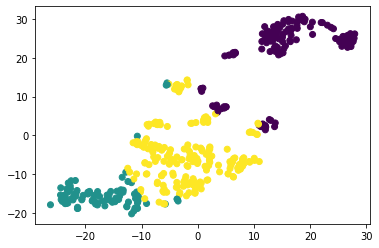

In [83]:
plt.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1],c=train_labels)
plt.show()

In [115]:
#x+train_labels
cl_train=x_train
cl_train['clust']=train_labels


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [117]:
(cl_train[cl_train['clust']==0])['CRIM'].median

<bound method Series.median of 477    15.02340
423     7.05042
437    15.17720
409    14.43830
434    13.91340
         ...   
359     4.26131
372     8.26725
458     7.75223
466     3.77498
435    11.16040
Name: CRIM, Length: 127, dtype: float64>

In [118]:
(cl_train[cl_train['clust']==1])['CRIM'].median

<bound method Series.median of 332    0.03466
56     0.02055
238    0.08244
250    0.14030
42     0.14150
        ...   
276    0.10469
191    0.06911
343    0.02543
188    0.12579
348    0.01501
Name: CRIM, Length: 86, dtype: float64>

In [119]:
(cl_train[cl_train['clust']==2])['CRIM'].median

<bound method Series.median of 15     0.62739
19     0.72580
325    0.19186
335    0.03961
334    0.03738
        ...   
20     1.25179
71     0.15876
106    0.17120
270    0.29916
102    0.22876
Name: CRIM, Length: 191, dtype: float64>